In [326]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [328]:
data = pd.read_csv('data/coupons.csv')
# data.head()
data.sample(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
4517,Home,Alone,Sunny,80,10PM,Carry out & Take away,1d,Female,36,Unmarried partner,...,gt8,4~8,gt8,1~3,1,0,0,1,0,0
7674,No Urgent Place,Alone,Sunny,80,10AM,Coffee House,1d,Male,36,Single,...,never,1~3,less1,less1,1,0,0,0,1,0
8137,Home,Alone,Rainy,55,10PM,Coffee House,1d,Male,31,Single,...,never,gt8,1~3,never,1,0,0,1,0,0
3386,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,50plus,Married partner,...,less1,gt8,gt8,1~3,1,1,0,0,1,0
313,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Male,41,Married partner,...,1~3,1~3,1~3,less1,1,1,0,0,1,0
5258,Work,Alone,Sunny,55,7AM,Coffee House,1d,Female,26,Unmarried partner,...,less1,1~3,less1,never,1,1,0,0,1,0
4598,No Urgent Place,Partner,Sunny,80,6PM,Restaurant(<20),1d,Male,36,Married partner,...,never,1~3,1~3,less1,1,0,0,0,1,1
2310,Work,Alone,Sunny,55,7AM,Bar,1d,Male,50plus,Married partner,...,gt8,never,4~8,less1,1,1,1,0,1,0
10071,Work,Alone,Rainy,55,7AM,Carry out & Take away,2h,Female,50plus,Single,...,1~3,less1,1~3,less1,1,1,0,1,0,0
12330,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,31,Married partner,...,never,1~3,1~3,1~3,1,1,0,0,1,0


In [9]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [330]:
## Getting counts and percentages of missing values for each column
data.isna().sum()
data.isna().mean().round(2).multiply(100).sort_values(ascending= False)
## The variable car is virtually empty (99%) missing so I will ignore it from now on. 
## CoffeeHouse, Restaurant20To50, RestaurantLessThan20,  CarryAway, Bar     have 1-2% missingness rate            

car                     99.0
CoffeeHouse              2.0
Restaurant20To50         1.0
RestaurantLessThan20     1.0
CarryAway                1.0
Bar                      1.0
destination              0.0
passanger                0.0
direction_opp            0.0
direction_same           0.0
toCoupon_GEQ25min        0.0
toCoupon_GEQ15min        0.0
toCoupon_GEQ5min         0.0
income                   0.0
occupation               0.0
education                0.0
has_children             0.0
maritalStatus            0.0
age                      0.0
gender                   0.0
expiration               0.0
coupon                   0.0
time                     0.0
temperature              0.0
weather                  0.0
Y                        0.0
dtype: float64

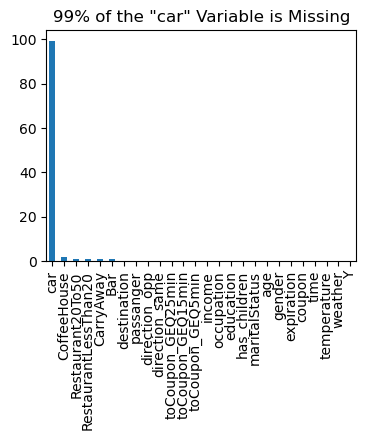

In [332]:
## Visualize the relative frequency of missing data with a bar plot for each variable.
plt.rcParams['figure.figsize'] = [4,3]
Missing_Rate= data.isna().mean().round(2).multiply(100).sort_values(ascending= False)
Missing_Rate.plot(kind = "bar").set(title='99% of the "car" Variable is Missing');

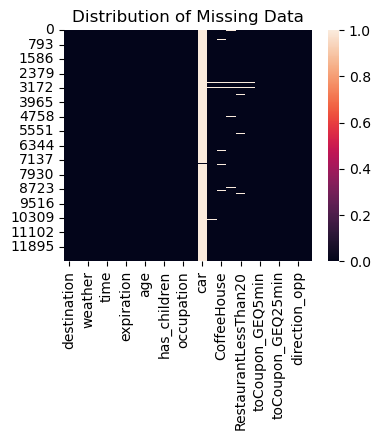

In [338]:
## Using a heat map to see if the missing data occur at random
sns.heatmap(data.isna()).set(title='Distribution of Missing Data');
## I do not see a problematic trend of clustered missing values so I think they might be missing at random 
plt.savefig('MissingData.png')

In [343]:
## I will ignore the column labeled car and fill NA's with the mode because the variables are categorical. 

# Fill missing values in the "Bar" column with the mode beacause they are all categorical

data["Bar"].fillna(data["Bar"].mode().iloc[0], inplace=True)
data["CoffeeHouse"].fillna(data["CoffeeHouse"].mode().iloc[0], inplace=True)
data["CarryAway"].fillna(data["CarryAway"].mode().iloc[0], inplace=True)
data["RestaurantLessThan20"].fillna(data["RestaurantLessThan20"].mode().iloc[0], inplace=True)
data["Restaurant20To50"].fillna(data["Restaurant20To50"].mode().iloc[0], inplace=True)
## 
## Verify that there are no more missing values except for the car variable
data.isna().mean().sort_values(ascending=False)


car                     0.991485
destination             0.000000
passanger               0.000000
direction_opp           0.000000
direction_same          0.000000
toCoupon_GEQ25min       0.000000
toCoupon_GEQ15min       0.000000
toCoupon_GEQ5min        0.000000
Restaurant20To50        0.000000
RestaurantLessThan20    0.000000
CarryAway               0.000000
CoffeeHouse             0.000000
Bar                     0.000000
income                  0.000000
occupation              0.000000
education               0.000000
has_children            0.000000
maritalStatus           0.000000
age                     0.000000
gender                  0.000000
expiration              0.000000
coupon                  0.000000
time                    0.000000
temperature             0.000000
weather                 0.000000
Y                       0.000000
dtype: float64

In [345]:
data.duplicated().sum()
# Drop row #74  
data = data.drop(74)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12683 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12683 non-null  object
 1   passanger             12683 non-null  object
 2   weather               12683 non-null  object
 3   temperature           12683 non-null  int64 
 4   time                  12683 non-null  object
 5   coupon                12683 non-null  object
 6   expiration            12683 non-null  object
 7   gender                12683 non-null  object
 8   age                   12683 non-null  object
 9   maritalStatus         12683 non-null  object
 10  has_children          12683 non-null  int64 
 11  education             12683 non-null  object
 12  occupation            12683 non-null  object
 13  income                12683 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12683 non-null  obj

In [347]:
acceptance_rate= data["Y"].mean().round(3)
# Print results with descriptive text

print(f"The overall acceptance rate= {acceptance_rate*100} %")


The overall acceptance rate= 56.8 %


coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2392
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64

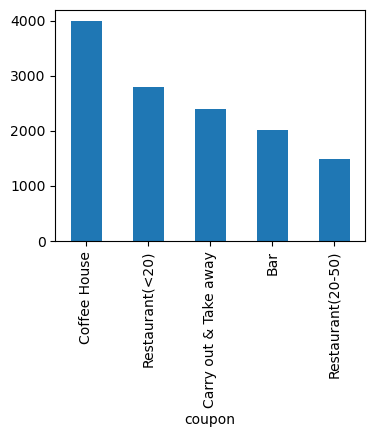

In [349]:
display(data['coupon'].value_counts())
data['coupon'].value_counts().plot(kind = "bar");

[Text(0.5, 1.0, 'Distribution of The Temperature Variable')]

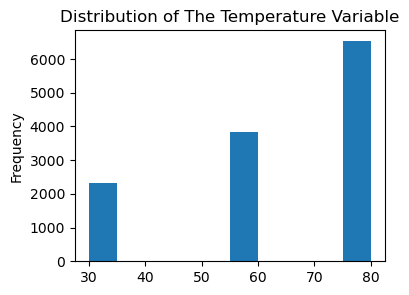

In [351]:
data['temperature'].plot(kind="hist").set(title="Distribution of The Temperature Variable")

## Summary of Categorical Variables

In [353]:
## Getting a summary of categorical variables (sample size, number of levels, freq of the most popular response).
data.describe(include="object")

,destination,passanger,weather,time,coupon,expiration,gender,age,maritalStatus,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
count,12683,12683,12683,12683,12683,12683,12683,12683,12683,12683,12683,12683,108,12683,12683,12683,12683,12683
unique,3,4,3,5,5,2,2,8,5,6,25,9,5,5,5,5,5,5
top,No Urgent Place,Alone,Sunny,6PM,Coffee House,1d,Female,21,Married partner,Some college - no degree,Unemployed,$25000 - $37499,Scooter and motorcycle,never,less1,1~3,1~3,less1
freq,6282,7305,10068,3230,3996,7091,6511,2653,5099,4351,1870,2013,22,5304,3602,4822,5505,6265


## Extracting the Bar Copouns

In [94]:
BarCoupons=data[data["coupon"]=="Bar"]
BarCoupons.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,2017.000000,2017.000000,2017.0,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,57.590481,0.433813,1.0,0.663361,0.252851,0.209222,0.790778,0.410015
std,17.950408,0.495723,0.0,0.472677,0.434754,0.406854,0.406854,0.491958
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,0.000000
75%,80.000000,1.000000,1.0,1.000000,1.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [100]:
Bar_acceptance_rate= BarCoupons["Y"].mean().round(2)
# Print results with descriptive text
print(f"Overall bar coupon acceptance rate= {Bar_acceptance_rate*100} %")

Overall bar coupon acceptance rate= 41.0 %


## Overall bar coupon acceptance rate= 41.0 %

In [104]:
## Frequency table of the Bar Variable
BarCoupons.groupby("Bar")["Y"].mean().round(3).sort_values()

Bar
never    0.193
less1    0.444
1~3      0.647
gt8      0.735
4~8      0.780
Name: Y, dtype: float64

In [118]:
BarCoupons.groupby(["Bar", "age"])["Y"].mean().round(2)
## filter out age levels " below21" and "21"
## filter out Bar levels "never", "less1"
# BarCoupons$BarMonthly =ifelse(("Bar" isin ["less1","never"]), "less1","more1")
# Filter out rows where age is below 21 or 21
filtered_data = BarCoupons[~BarCoupons["age"].isin(["below21", "21"])]

# Create a new column 'BarMonthly' based on bar frequency
filtered_data["BarMonthly"] = filtered_data["Bar"].apply(lambda x: "more1" if x not in ["less1", "never"] else "less1")

# Create two groups: 
# 1. Drivers who go to a bar more than once a month and are over the age of 25
# 2. All other drivers
More1_Gt25 = filtered_data[(filtered_data["BarMonthly"] == "more1") & (filtered_data["age"] > "25")]
Less1_Lt25 = filtered_data[(filtered_data["BarMonthly"] == "less1") | (filtered_data["age"] <= "25")]

# Calculate the acceptance rate for both groups
Rate1 = More1_Gt25["Y"].mean().round(2)
Rate2 = Less1_Lt25["Y"].mean().round(2)

# Print results
print(f"Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25= {Rate1*100} %")
print(f"Acceptance rate for drivers who go to a bar less than once a month OR are under the age of 25= {Rate2*100} %")

Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25= 70.0 %
Acceptance rate for drivers who go to a bar less than once a month OR are under the age of 25= 26.0 %


C:\Users\amhasan1\AppData\Local\Temp\ipykernel_32008\738618076.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["BarMonthly"] = filtered_data["Bar"].apply(lambda x: "more1" if x not in ["less1", "never"] else "less1")


## Insight: 
- Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25= 70.0 %
- Acceptance rate for drivers who go to a bar less than once a month OR are under the age of 25= 26.0 %

In [128]:
# Create a new group for drivers who go to bars more than once a month and had passengers that were not a kid
# and had occupations other than farming, fishing, or forestry
# Let group 3 be the drivers who go to bars more than once a month and had passengers that were not a kid
# and had occupations other than farming, fishing, or forestry
df =  BarCoupons
group3 = df[(df['Bar'].isin(['1~3', '4~8', 'gt8'])) &  # Visit bars more than once a month
    (df['passanger'] != 'Kid(s)') &            # Passengers were not kids
    (~df['occupation'].isin(['Farming', 'Fishing', 'Forestry']))  # Excluding specific occupations
]
# group3.head(10)

## Creating group 4 by using the complement of the conditions for Group 3
group4 = df[~(df['Bar'].isin(['1~3', '4~8', 'gt8'])) | 
    (df['passanger'] == 'Kid(s)') |            
    (df['occupation'].isin(['Farming', 'Fishing', 'Forestry']))  
]
group4.describe(include="object")
group4.head()

# Calculate the acceptance rate for both groups
Rate3 = group3["Y"].mean().round(2)
Rate4 = group4["Y"].mean().round(2)

# Print results
print(f"The acceptance rate for drivers who go to bars more than once a month, had no kid passengers, and an occupations other than farming,fishing, or forestry= {Rate3*100}%")
print(f"The acceptance rate for other drivers= {Rate4*100}%")

The acceptance rate for drivers who go to bars more than once a month, had no kid passengers, and an occupations other than farming,fishing, or forestry= 71.0%
The acceptance rate for other drivers= 30.0%


## Insights:
The acceptance rate for drivers who go to bars more than once a month, had no kid passengers, and an occupations other than farming,fishing, or forestry= 71.0%
The acceptance rate for other drivers= 30.0%

In [133]:

 #   go to bars more than once a month, had passengers that were not a kid, and were not widowed 

group5 = df[~(df['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
    ~(df['passanger'] == 'Kid(s)')&           
    ~(df['maritalStatus'].isin(['Widowed']))  
]
group5.describe(include="object")
group5.head()

# Calculate the acceptance rate for both groups
Rate5 = group5["Y"].mean().round(2)
 #   go to bars more than once a month and are under the age of 30 OR
 #   go to cheap restaurants more than 4 times a month and income is less than 50K.
# Print results
print(f"The acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed ={Rate5 *100}%")

The acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed =31.0%


# Insight:
- The acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed =31.0%

In [138]:
restaurant_frequent_visitors = df[~(df['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & 
    (df['income'].isin(['$25000 - $37499', '$12500 - $24999',  '$37500 - $49999' ]))  
]
restaurant_frequent_visitors.describe(include="object")
restaurant_frequent_visitors.head()

# Calculate the acceptance rate for the specified group
acceptance_rate_restaurant_visitors = restaurant_frequent_visitors["Y"].mean().round(2)

# Print results with descriptive text
print(f"The acceptance rate for frequent restaurant visitors earning less than $50K: {acceptance_rate_restaurant_visitors*100}%")


The acceptance rate for frequent restaurant visitors earning less than $50K: 39.0%


## Insight:
#### The acceptance rate for frequent restaurant visitors earning less than $50K: 39%


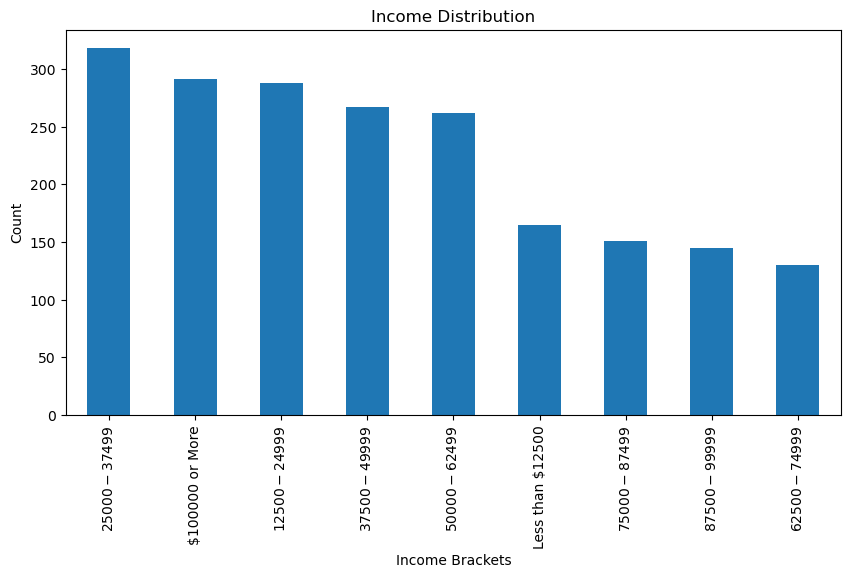

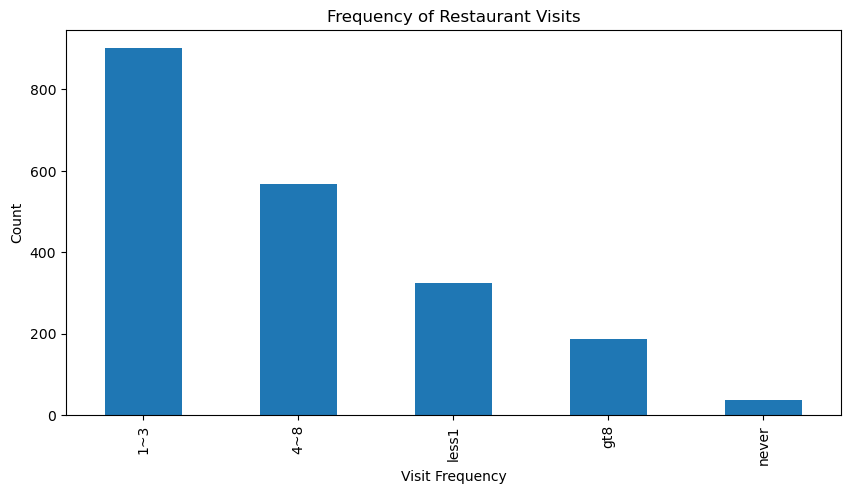

In [191]:

# Plot income distribution
income_counts = df['income'].value_counts()
income_counts.plot(kind='bar', figsize=(10, 5), title='Income Distribution', ylabel='Count', xlabel='Income Brackets')
plt.show()

# Plot RestaurantLessThan20 distribution
restaurant_counts = df['RestaurantLessThan20'].value_counts()
restaurant_counts.plot(kind='bar', figsize=(10, 5), title='Frequency of Restaurant Visits', ylabel='Count', xlabel='Visit Frequency')
plt.show()


RestaurantLessThan20
1~3      901
4~8      568
less1    325
gt8      186
never     37
Name: count, dtype: int64

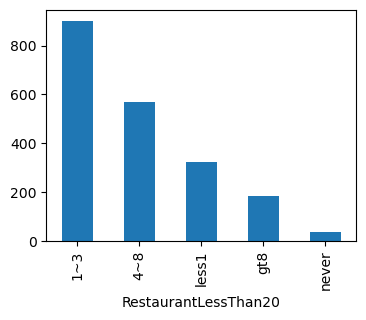

In [144]:
display(df['RestaurantLessThan20'].value_counts())
df['RestaurantLessThan20'].value_counts().plot(kind = "bar");

In [160]:

 # go to cheap restaurants more than 4 times a month and income is less than 50K.

group6 = df[~(df['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & 
    (df['income'].isin(['$25000 - $37499', '$12500 - $24999',  '$37500 - $49999'  ])) ]
# group6.describe(include="object")

# Calculate the acceptance rate for both groups
Rate6 = group6["Y"].mean().round(2)
 #   go to bars more than once a month and are under the age of 30 OR
 #   go to cheap restaurants more than 4 times a month and income is less than 50K.
# Print results
print(f"Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K= {Rate6*100}%")

Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K= 39.0%


## Insight:
### Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K= 39.0%

## Free Exploration of the Coffee House Copouns

In [271]:
Coffee_DF =data[data["coupon"]=="Coffee House"]
Coffee_DF.describe(include="object")
## Exploring those who accept the coffee copouns
#Accept_Coffee_DF =Coffee_DF [Coffee_DF["Y"]=="1"]
# Accept_Coffee_DF.describe(include="object")

,destination,passanger,weather,time,coupon,expiration,gender,age,maritalStatus,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
count,3996,3996,3996,3996,3996,3996,3996,3996,3996,3996,3996,3996,37,3996,3996,3996,3996,3996
unique,3,4,3,5,1,2,2,8,5,6,25,9,5,5,5,5,5,5
top,No Urgent Place,Alone,Sunny,6PM,Coffee House,2h,Female,21,Single,Some college - no degree,Unemployed,$25000 - $37499,Scooter and motorcycle,never,less1,1~3,1~3,less1
freq,2155,2256,3467,1093,3996,2227,2051,883,1550,1371,570,640,10,1673,1147,1553,1729,1924


In [226]:
acceptance_rate= Coffee_DF["Y"].mean().round(2)
# Print results with descriptive text
print(f"The overall coffee coupon acceptance rate= {acceptance_rate*100} %")

The overall coffee coupon acceptance rate= 50.0 %


## Insight: The overall coffee coupon acceptance rate= 49.9 %

In [355]:
Single_Unemployed_F= Coffee_DF[(Coffee_DF['gender']==('Female'))& 
(Coffee_DF['maritalStatus']==('Single')) &
(Coffee_DF['occupation']==('Unemployed'))]
Rate=Single_Unemployed_F["Y"].mean().round(2)
print(f"The overall coffee coupon acceptance rate for single, unemployed females= {Rate*100} %")

The overall coffee coupon acceptance rate for single, unemployed females= 56.00000000000001 %


In [357]:
Single_Unemployed_F_Never= Coffee_DF[(Coffee_DF['gender']==('Female'))& 
(Coffee_DF['maritalStatus']==('Single')) &
(Coffee_DF['occupation']==('Unemployed'))&
(Coffee_DF['Bar']==('never'))]
Rate1=Single_Unemployed_F_Never["Y"].mean().round(2)
print(f"The overall coffee coupon acceptance rate for single, unemployed females who never go to bars= {Rate1*100} %")

The overall coffee coupon acceptance rate for single, unemployed females who never go to bars= 50.0 %


In [359]:
Single_Unemployed_F_21= Coffee_DF[(Coffee_DF['gender']==('Female'))& 
(Coffee_DF['maritalStatus']==('Single')) &
(Coffee_DF['occupation']==('Unemployed'))&
(Coffee_DF['age']==('21'))]
Rate2=Single_Unemployed_F_21["Y"].mean().round(2)
print(f"The coffee coupon acceptance rate for single, unemployed females who are 21 years old= {Rate2*100} %")

The coffee coupon acceptance rate for single, unemployed females who are 21 years old= 59.0 %


In [361]:
Single_Sunny= Coffee_DF[(Coffee_DF['maritalStatus']==('Single')) & (Coffee_DF['weather']==('Sunny'))]
RateSS = Single_Sunny ["Y"].mean().round(2)
print(f"The overall coffee coupon acceptance rate for single, unemployed females who are 21 years old= {RateSS*100} %")

The overall coffee coupon acceptance rate for single, unemployed females who are 21 years old= 52.0 %


In [363]:
Single_Sunny= Coffee_DF[
(Coffee_DF['maritalStatus']==('Single')) &
(Coffee_DF['weather']==('Sunny'))]
Rate3= Single_Sunny["Y"].mean().round(2)
print(f"The overall coffee coupon acceptance rate for single drivers on a sunny day = {Rate3*100} %")

The overall coffee coupon acceptance rate for single drivers on a sunny day = 52.0 %


In [365]:
Sunny_Alone= Coffee_DF[(Coffee_DF['weather']==('Sunny'))& (Coffee_DF['passanger']==('Alone'))]
Rate4= Sunny_Alone["Y"].mean().round(2)
print(f"The overall coffee coupon acceptance rate on a sunny day for an alone driver = {Rate4*100} %")

The overall coffee coupon acceptance rate on a sunny day for an alone driver = 43.0 %


In [367]:
# Calculate the acceptance rate for each income level
income_acceptance_rates = Coffee_DF.groupby('income')["Y"].mean().round(2)

# Print the results with descriptive text for each income level
for income_level, rate in income_acceptance_rates.items():
    print(f"The coffee coupon acceptance rate for drivers with income '{income_level}' is {rate*100} %")

The coffee coupon acceptance rate for drivers with income '$100000 or More' is 49.0 %
The coffee coupon acceptance rate for drivers with income '$12500 - $24999' is 54.0 %
The coffee coupon acceptance rate for drivers with income '$25000 - $37499' is 47.0 %
The coffee coupon acceptance rate for drivers with income '$37500 - $49999' is 54.0 %
The coffee coupon acceptance rate for drivers with income '$50000 - $62499' is 50.0 %
The coffee coupon acceptance rate for drivers with income '$62500 - $74999' is 44.0 %
The coffee coupon acceptance rate for drivers with income '$75000 - $87499' is 30.0 %
The coffee coupon acceptance rate for drivers with income '$87500 - $99999' is 56.00000000000001 %
The coffee coupon acceptance rate for drivers with income 'Less than $12500' is 55.00000000000001 %


In [369]:
# Calculate the acceptance rate for each income level on a sunny day when the driver is alone
income_acceptance_rates = Sunny_Alone.groupby('income')["Y"].mean().round(2)

# Print the results with descriptive text for each income level
for income_level, rate in income_acceptance_rates.items():
    print(f"The coffee coupon acceptance rate for drivers with income '{income_level}' is {rate*100} %")

The coffee coupon acceptance rate for drivers with income '$100000 or More' is 44.0 %
The coffee coupon acceptance rate for drivers with income '$12500 - $24999' is 47.0 %
The coffee coupon acceptance rate for drivers with income '$25000 - $37499' is 39.0 %
The coffee coupon acceptance rate for drivers with income '$37500 - $49999' is 46.0 %
The coffee coupon acceptance rate for drivers with income '$50000 - $62499' is 42.0 %
The coffee coupon acceptance rate for drivers with income '$62500 - $74999' is 41.0 %
The coffee coupon acceptance rate for drivers with income '$75000 - $87499' is 26.0 %
The coffee coupon acceptance rate for drivers with income '$87500 - $99999' is 50.0 %
The coffee coupon acceptance rate for drivers with income 'Less than $12500' is 47.0 %


## Insights: 
- The overall coffee coupon acceptance rate= 50.0 %
- The coffee coupon acceptance rate for single, unemployed females who are 21 years old= 59.0 %
- No clear trend with income levels. 